In [ ]:


import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch
import torchvision
from torchvision import models
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm


import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import glob, os
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)


import tensorflow as tf
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
import cv2
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from PIL import Image
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.applications import EfficientNetB7, inception_v3
import random
import time
import torch
size=224

In [ ]:


address = ".../CBIS_DDSM/Train/"
import math
all_images = []
all_labels = []
all_labels_b = []
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images.append(img)
    labels = each_img.split("/")[-3]
    all_labels.append(labels)
    labels = each_img.split("/")[-2]
    all_labels_b.append(labels)


x_test_lum=np.array(all_images)
y_test_lum=np.array(all_labels)
y_test_lum_b=np.array(all_labels_b)
print("all images:",len(x_test_lum),x_test_lum.shape)
print("all labels:",len(y_test_lum),y_test_lum.shape)
print("all labels b:",len(y_test_lum_b),y_test_lum_b.shape)


plt.hist(y_test_lum_b)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()


#
#

le = LabelEncoder()
y_test_lum_b = le.fit_transform(y_test_lum_b)
print(list(le.inverse_transform([0, 1,2,3,4,5])))
y_test_lum = le.fit_transform(y_test_lum)
print(list(le.inverse_transform([0, 1])))
#------------------




In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
sm = RandomOverSampler (random_state=42 ,sampling_strategy={1:200, 2:200})

train_rows=len(x_test_lum)
x1 = x_test_lum.reshape(train_rows,-1) #(2079,512*512*3)
train_rows1=len(y_test_lum)
#y2=y_test_tn_b
y2 = y_test_lum.reshape(train_rows1,-1) #(2079,512*512*3)
#xyb = [(x1[i],y2[i]) for i in range(len(x1))]
#y2= y2.tostring()
xyb=np.hstack((x1,y2))
xyb, y_train_b = sm.fit_resample(xyb, y_test_lum_b)
y_train= xyb[:,size*size*3]
x=np.delete(xyb , size*size*3,1)
x_train = x.reshape(-1,size,size,3)

print(x_train.shape , y_train.shape,y_train_b.shape )
plt.hist(y_train_b)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()
plt.hist(y_train)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()



In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
sm = SMOTE (random_state=42 )
xy2=[]
train_rows=len(x_train)
x1 = x_train.reshape(train_rows,-1) #(2079,512*512*3)
train_rows1=len(y_train)
#y2=y_test_tn_b
y2 = y_train.reshape(train_rows1,-1) #(2079,512*512*3)
#xyb = [(x1[i],y2[i]) for i in range(len(x1))]
#xyb=[[x1,y2]]
xyb=np.hstack((x1,y2))

xyb, y_train_b = sm.fit_resample(xyb, y_train_b)
#y_train= xyb[:,150528]

#y_train= xyb[:,150528]
#x=np.delete(xyb , 150528,1)




In [ ]:
print(xyb.shape)

(3108, 150529)


In [ ]:

for i in range(0,2949):
    if 0<xyb[i,size*size*3]<1:

        xyb=np.delete(xyb,i,0)

        #xy2.append(xy22)



In [ ]:

for i in range(0,2911):
    if 0<xyb[i,size*size*3]<1:

        xyb=np.delete(xyb,i,0)

        #xy2.append(xy22)



In [ ]:

for i in range(0,2907):
    if 0<xyb[i,size*size*3]<1:

        xyb=np.delete(xyb,i,0)

        #xy2.append(xy22)



In [ ]:
print(xyb.shape)#2908

(2908, 150529)


In [ ]:
#if 0<xyb[i,size*size*3]<1:
y_train= xyb[:,size*size*3]

x=np.delete(xyb , size*size*3,1)

x_train = x.reshape(-1,size,size,3)
print(x_train.shape , y_train.shape,y_train_b.shape )
plt.hist(y_train_b)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()
plt.hist(y_train)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()


In [ ]:
fig = plt.figure(figsize = (15, 10))
for i in range(25):
    rand = random.randint(0,len(y_train))
    ax = plt.subplot(5, 5, i+1)
    img = x_train[rand]
    if y_train[rand] == 0:
        if y_train_b[rand] == 0:
            plt.title('Benign, b0')
        if y_train_b[rand] == 1:
            plt.title('Benign, b1')
        if y_train_b[rand] == 2:
            plt.title('Benign, b2')
        if y_train_b[rand] == 3:
            plt.title('Benign, b3')
        if y_train_b[rand] == 4:
            plt.title('Benign, b4')
        if y_train_b[rand] == 5:
            plt.title('Benign, b5')
    else:
        if y_train_b[rand] == 0:
            plt.title('Malignant, b0')
        if y_train_b[rand] == 1:
            plt.title('Malignant, b1')
        if y_train_b[rand] == 2:
            plt.title('Malignant, b2')
        if y_train_b[rand] == 3:
            plt.title('Malignant, b3')
        if y_train_b[rand] == 4:
            plt.title('Malignant, b4')
        if y_train_b[rand] == 5:
            plt.title('Malignant, b5')
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(img , cmap='gray')

In [ ]:
np.save(".../x_train.npy" , x_train)
np.save(".../y_train.npy" , y_train)
np.save(".../y_train_birads.npy" , y_train_b)


In [ ]:


address = ".../CBIS_DDSM/Test"
import math
all_images = []
all_labels = []
all_labels_birads = []
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images.append(img)
    labels = each_img.split("/")[-3]
    all_labels.append(labels)
    labels = each_img.split("/")[-2]
    all_labels_birads.append(labels)


x_test=np.array(all_images)
y_test=np.array(all_labels)
y_test_b=np.array(all_labels_birads)
print("all images:",len(x_test),x_test.shape)
print("all labels:",len(y_test),y_test.shape)
print("all labels b:",len(y_test_b),y_test_b.shape)

all images: 337 (337, 224, 224, 3)
all labels: 337 (337,)
all labels b: 337 (337,)


In [ ]:
plt.hist(y_test_b)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()

In [ ]:
le = LabelEncoder()
y_test_b = le.fit_transform(y_test_b)
print(list(le.inverse_transform([0, 1,2,3,4,5])))
y_test = le.fit_transform(y_test)
print(list(le.inverse_transform([0, 1])))
#------------------



['b0', 'b1', 'b2', 'b3', 'b4', 'b5']
['Benign', 'Malignant']


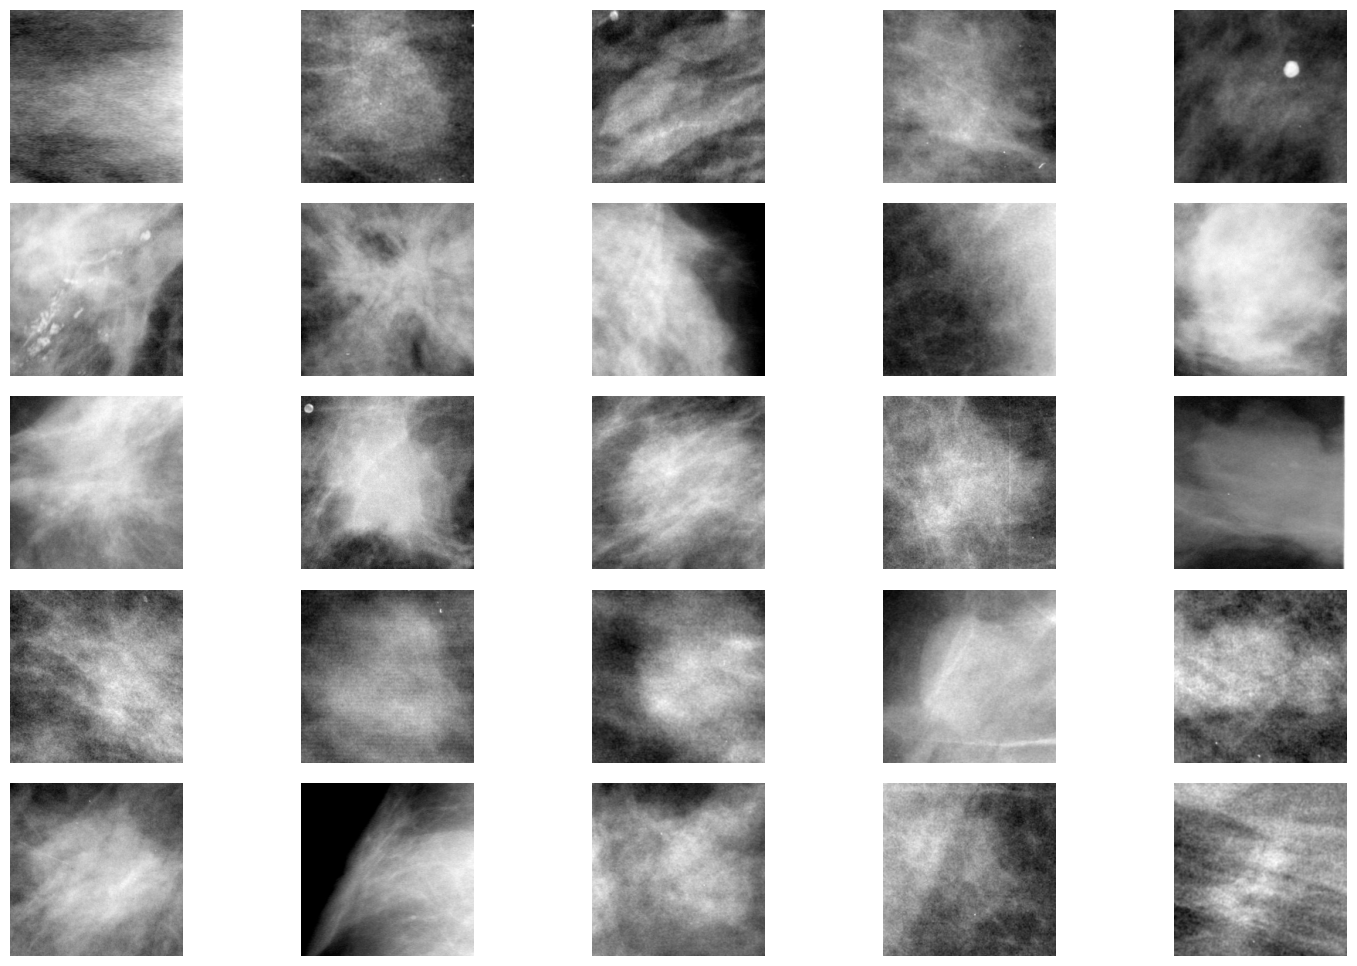

In [ ]:
fig = plt.figure(figsize = (15, 10))
for i in range(25):
    rand = random.randint(0,len(y_test))
    ax = plt.subplot(5, 5, i+1)
    img = x_test[rand]
    if y_test[rand] == "Benign":
        if y_test_b[rand] == "b0":
            plt.title('Benign, b0')
        if y_test_b[rand] == "b1":
            plt.title('Benign, b1')
        if y_test_b[rand] == "b2":
            plt.title('Benign, b2')
        if y_test_b[rand] == "b3":
            plt.title('Benign, b3')
        if y_test_b[rand] == "b4":
            plt.title('Benign, b4')
        if y_test_b[rand] == "b5":
            plt.title('Benign, b5')
    else:
        if y_test_b[rand] == "b0":
            plt.title('Malignant, b0')
        if y_test_b[rand] == "b1":
            plt.title('Malignant, b1')
        if y_test_b[rand] == "b2":
            plt.title('Malignant, b2')
        if y_test_b[rand] == "b3":
            plt.title('Malignant, b3')
        if y_test_b[rand] == "b4":
            plt.title('Malignant, b4')
        if y_test_b[rand] == "b5":
            plt.title('Malignant, b5')
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(img , cmap='gray')

In [ ]:
num_classes=2
#le = LabelEncoder()
#y_lum = le.fit_transform(y_lum)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense, Dropout
from tensorflow.keras.applications import EfficientNetB7, inception_v3
from tensorflow.keras import layers, activations, optimizers, losses, metrics
from tensorflow.keras.layers import  Concatenate , Input
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
inputs = Input(shape=(size, size, 3))
from keras.regularizers import l2

from keras.regularizers import l2
#x_2 =keras.models.Model(inputs=model0.input, outputs=model0.get_layer('conv_7b_ac').output)
#x_3 = x_2.output
#x_2 = x_2(inputs, training=True)
#x_mlo=x_2(inputs)
from keras.regularizers import l2
base_model1 = tf.keras.applications.VGG16(input_shape=(size,size,3), weights='imagenet', include_top=False)
x_2 = base_model1.output
x1 = Flatten()(x_2)
x1 = Dense(4096,activation='relu',kernel_regularizer=l2(0.000001))(x1)
x1 = Dropout(0.2)(x1,training=True)
x1 = Dense(4096,activation='relu',kernel_regularizer=l2(0.000001))(x1)
x1 = Dropout(0.2)(x1,training=True)
#x1 = Dense(1000,activation='relu',kernel_regularizer=l2(0.000001))(x1)
#x1 = Dropout(0.2)(x1)
#x1 = Dense(1000,activation='relu',kernel_regularizer=l2(0.000001))(x1)

x1 = Dense(2, 'softmax')(x1)


#model1 =Model(inputs=inputs, outputs = [x1])
model = keras.models.Model(inputs = base_model1.input, outputs = [x1])
#model.summary()

METRICS = [
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')]



# model.compile(optimizer=optimizers.Adam(.00005),  loss='binary_crossentropy', metrics=['accuracy', METRICS])
model.compile(optimizer=optimizers.Adam(.00001),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
               loss='binary_crossentropy',
              metrics=['accuracy'])#, METRICS

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  #featurewise_center=True,
# #featurewise_std_normalization=True,
  rotation_range=90,
  fill_mode='constant',
  #width_shift_range=0.2,
  #height_shift_range=0.2,
  horizontal_flip=True,
  vertical_flip=True)
  #zoom_range=0.1)
# brightness_range=[0.5,1.5])
  #shear_range=45)


history = model.fit(datagen.flow(x_train,y_train, batch_size=32),
                    steps_per_epoch=len(y_train)//32, epochs=201)

In [ ]:
xxx = model.predict(x_test)
xx = np.argmax(xxx,axis=1)
test_labels11=np.argmax(y_test, axis=1)
print(classification_report(test_labels11, xx, digits=4))

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 499ms/step
              precision    recall  f1-score   support

           0     0.7821    0.6489    0.7093       188
           1     0.6354    0.7718    0.6970       149

    accuracy                         0.7033       337
   macro avg     0.7087    0.7104    0.7031       337
weighted avg     0.7172    0.7033    0.7038       337



In [ ]:
model.save('.../VGGmodel.h5')